In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2, keras
import tensorflow as tf
import PIL
from PIL import Image
import os

In [2]:
import os
import pandas as pd

train_path = 'car-object-detection/data/training_images'
annot = 'car-object-detection/data/train_solution_bounding_boxes (1).csv'

# Check if the file exists
if os.path.exists(annot):
    labels = pd.read_csv(annot)
    print(labels.head())
else:
    print(f"File not found: {annot}")

File not found: car-object-detection/data/train_solution_bounding_boxes (1).csv


In [3]:
# Plot Images with annot 
def display_image(path, box=None, specific=False):  
#     print(int(box['xmin']), int(box['ymin']), int(box['xmax']-box['xmin']), int(box['ymax']-box['ymin']))
    if not specific:
        plt.imshow(Image.open(path))
        img = Image.open(path)
        fig, ax = plt.subplots()
        ax.imshow(img)
        rect = patches.Rectangle((int(box['xmin']), int(box['ymin'])), int(box['xmax']-box['xmin']), int(box['ymax']-box['ymin']), linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.show()
    else:
        plt.imshow(path)
        fig, ax = plt.subplots()
        ax.imshow(path)
        for i in box:
            rect = patches.Rectangle((int(i[0]-(i[2]/2)), int(i[1]-(i[3]/2))), int(i[2]), int(i[3]), linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        plt.show()

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the paths
train_path = 'car-object-detection/data/training_images'
annot = 'car-object-detection/data/train_solution_bounding_boxes (1).csv'

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Print the files and directories in the current working directory
print("Files in the current directory:", os.listdir('.'))

# Print the files and directories in the 'car-object-detection' directory
if os.path.exists('car-object-detection'):
    print("Files in 'car-object-detection/':", os.listdir('car-object-detection'))
else:
    print("'car-object-detection' directory not found.")

# Print the files and directories in the 'car-object-detection/data' directory
if os.path.exists('car-object-detection/data'):
    print("Files in 'car-object-detection/data/':", os.listdir('car-object-detection/data'))
else:
    print("'car-object-detection/data' directory not found.")

# Ensure the file exists
if os.path.exists(annot):
    labels = pd.read_csv(annot)
    print(labels.head())
else:
    print(f"File not found: {annot}")
    labels = None

# Define display_image function
def display_image(image_path, labels):
    img = plt.imread(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for idx, row in labels.iterrows():
        rect = patches.Rectangle((row['xmin'], row['ymin']), row['xmax'] - row['xmin'], row['ymax'] - row['ymin'], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

# Check if labels DataFrame is defined and not empty
if labels is not None and not labels.empty:
    image_path = os.path.join(train_path, labels['image'][0])
    display_image(image_path, labels[0:1])
else:
    print("Labels DataFrame is not defined or is empty.")


Current Working Directory: D:\R-CNN
Files in the current directory: ['.ipynb_checkpoints', 'car-detection-using-rcnn.ipynb', 'chart_loss.png', 'data', 'ieeercnn_vgg16_1.keras', 'model_final.h5']
'car-object-detection' directory not found.
'car-object-detection/data' directory not found.
File not found: car-object-detection/data/train_solution_bounding_boxes (1).csv
Labels DataFrame is not defined or is empty.


In [5]:
import cv2
from cv2 import ximgproc

# Enable OpenCV optimizations
cv2.setUseOptimized(True)

# Create a Selective Search Segmentation object
ss = ximgproc.segmentation.createSelectiveSearchSegmentation()

print("Selective Search Segmentation object created successfully.")



Selective Search Segmentation object created successfully.


In [6]:
# Get Intersection over Union computed by selective search
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [7]:
train_images = []
train_labels = []

In [8]:
import os
import pandas as pd
import cv2

# Define paths
train_path = 'car-object-detection/data/training_images'
annot = 'car-object-detection/data/train_solution_bounding_boxes (1).csv'

# Check if the annotation file exists
if os.path.exists(annot):
    # Read the CSV file into a DataFrame
    labels = pd.read_csv(annot)
    
    # Check if the DataFrame is empty or not
    if not labels.empty:
        # Loop through each label
        for i in range(len(labels)):
            # Read image
            image = cv2.imread(os.path.join(train_path, labels['image'][i]))
            
            # Proceed with your processing code here
            
    else:
        print("Error: The labels DataFrame is empty.")
else:
    print(f"Error: File not found - {annot}")


Error: File not found - car-object-detection/data/train_solution_bounding_boxes (1).csv


In [9]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

# Example usage (add your specific code below)
vgg16_model = VGG16(weights='imagenet', include_top=False)
datagen = ImageDataGenerator(rescale=1./255)

print("VGG16 model and ImageDataGenerator created successfully.")


VGG16 model and ImageDataGenerator created successfully.


In [11]:
from keras.applications.vgg16 import VGG16

# Load pre-trained VGG16 model with weights from ImageNet
vggmodel = VGG16(weights='imagenet', include_top=True)

# Print model summary
vggmodel.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras.applications.vgg16 import VGG16

# Import VGG16 model with pre-trained weights
vggmodel = VGG16(weights='imagenet', include_top=True)

# Access the output of the second-to-last layer
X = vggmodel.layers[-2].output

# Print the summary of VGG16 model
vggmodel.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
predictions = Dense(2, activation='softmax')(X)

In [14]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.models import Model

# Import VGG16 model with pre-trained weights
vggmodel = VGG16(weights='imagenet', include_top=True)

# Define your output layer (example with Dense layer)
num_classes = 10  # Example number of classes
predictions = Dense(num_classes, activation='softmax')(vggmodel.output)

# Create the final model
model_final = Model(inputs=vggmodel.input, outputs=predictions)

# Print the summary of the final model
model_final.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,367,554 (527.83 MB)

 Trainable params: 138,367,554 (527.83 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [16]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [17]:
model_final.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,367,554 (527.83 MB)

 Trainable params: 138,367,554 (527.83 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [19]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [20]:
from sklearn.preprocessing import LabelBinarizer

# Example data (replace with your actual data)
y_new = ['class1', 'class2', 'class1', 'class3']  # Replace with your actual labels

# Check if y_new is not empty and contains valid data
if len(y_new) > 0:
    lenc = LabelBinarizer()
    Y = lenc.fit_transform(y_new)
    print("Label binarization successful.")
else:
    print("Error: y_new is empty. Ensure it contains valid data.")

# Print transformed labels
print("Transformed labels:")
print(Y)


Label binarization successful.
Transformed labels:
[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]]


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Example data
y_new = [0, 1, 0, 2, 1]  # Replace with your actual data

# Binarize labels
lenc = LabelBinarizer()
Y = lenc.fit_transform(y_new)

# Example feature data (replace with your actual X_new)
X_new = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]

# Convert lists to NumPy arrays
X_new = np.array(X_new)
Y = np.array(Y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (4, 3)
X_test shape: (1, 3)
y_train shape: (4, 3)
y_test shape: (1, 3)


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Example data
y_new = [0, 1, 0, 2, 1]  # Replace with your actual data

# Binarize labels
lenc = LabelBinarizer()
Y = lenc.fit_transform(y_new)

# Example feature data (replace with your actual X_new)
X_new = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]

# Convert lists to NumPy arrays
X_new = np.array(X_new)
Y = np.array(Y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (4, 3)
X_test shape: (1, 3)
y_train shape: (4, 3)
y_test shape: (1, 3)


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Example data
y_new = [0, 1, 0, 2, 1]  # Replace with your actual data

# Binarize labels
lenc = LabelBinarizer()
Y = lenc.fit_transform(y_new)

# Example feature data (replace with your actual X_new)
X_new = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]

# Convert lists to NumPy arrays
X_new = np.array(X_new)
Y = np.array(Y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

# Convert splits to NumPy arrays (if necessary)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4, 3)
X_test shape: (1, 3)
y_train shape: (4, 3)
y_test shape: (1, 3)


In [24]:
y_train

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [25]:
import numpy as np  # Import NumPy for array operations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Example data
y_new = [0, 1, 0, 2, 1]  # Replace with your actual data

# Binarize labels
lenc = LabelBinarizer()
Y = lenc.fit_transform(y_new)

# Example feature data (replace with your actual X_new)
X_new = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]

# Convert to NumPy arrays
X_new = np.array(X_new)
Y = np.array(Y)

# Reshape data to the shape (n_samples, height, width, channels)
X_new = X_new.reshape((X_new.shape[0], 1, 1, X_new.shape[1]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

# Print their shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Data augmentation with ImageDataGenerator
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

# Now you can use traindata and testdata for model training


X_train shape: (4, 1, 1, 3)
X_test shape: (1, 1, 1, 3)
y_train shape: (4, 3)
y_test shape: (1, 3)


In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Example checkpoint and early stopping
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.keras", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

# If you want to save every epoch, you can use save_freq=1
# checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.keras", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)

# If you intended to save every n epochs, you would need a custom callback or loop to handle this logic.
# However, Keras ModelCheckpoint itself does not have a period parameter.

# Usage in model.fit():
# model.fit(..., callbacks=[checkpoint, early])


In [29]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Example data
y_new = [0, 1, 0, 2, 1]  # Replace with your actual data

# Binarize labels
lenc = LabelBinarizer()
Y = lenc.fit_transform(y_new)

# Example feature data (replace with your actual X_new)
X_new = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]

# Convert to NumPy arrays
X_new = np.array(X_new)
Y = np.array(Y)

# Reshape data to the shape (n_samples, height, width, channels)
X_new = X_new.reshape((X_new.shape[0], 1, 1, X_new.shape[1]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

# Data augmentation with ImageDataGenerator
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

# Example model
model_final = Sequential([
    Flatten(input_shape=(1, 1, 3)),  # Adjust input shape accordingly
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for checkpoint and early stopping
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.keras", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

# Fit the model
hist = model_final.fit(
    traindata, 
    steps_per_epoch=10, 
    epochs=20, 
    validation_data=testdata, 
    validation_steps=2, 
    callbacks=[checkpoint, early]
)


Epoch 1/20


C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 1/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2500 - loss: 6.9025

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 1: val_loss improved from inf to 0.00128, saving model to ieeercnn_vgg16_1.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2500 - loss: 6.9025 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2500 - loss: 6.7806
Epoch 2: val_loss did not improve from 0.00128
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2500 - loss: 6.7806 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 3/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.2500 - loss: 6.6760
Epoch 3: val_loss did not improve from 0.00128
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2500 - loss: 6.6760 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2500 - loss: 6.5722
Epoch 4: val_loss did not improve from 0.00128
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2500 - loss: 6.5722 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - 

In [30]:
# Save the model with a .h5 extension
model_final.save('model_final.h5')

# Or save with a .keras extension
# model_final.save('model_final.keras')


Epoch 1/10


C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.3352 - loss: 0.7315 - val_accuracy: 0.4000 - val_loss: 0.6967
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3516 - loss: 0.7310 - val_accuracy: 0.4500 - val_loss: 0.7005
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4133 - loss: 0.7204 - val_accuracy: 0.5000 - val_loss: 0.7034
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4414 - loss: 0.7117 - val_accuracy: 0.5000 - val_loss: 0.7059
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4437 - loss: 0.7202 - val_accuracy: 0.5500 - val_loss: 0.7085
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4219 - loss: 0.7231 - val_accuracy: 0.5500 - val_loss: 0.7109
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4258 - loss: 0.7216 - val_accuracy: 0.5500 - val_loss: 0.7136
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4219 - loss: 0.7170 - val_accuracy: 0.5500 - val_loss: 0.7162
Epoch 9/10

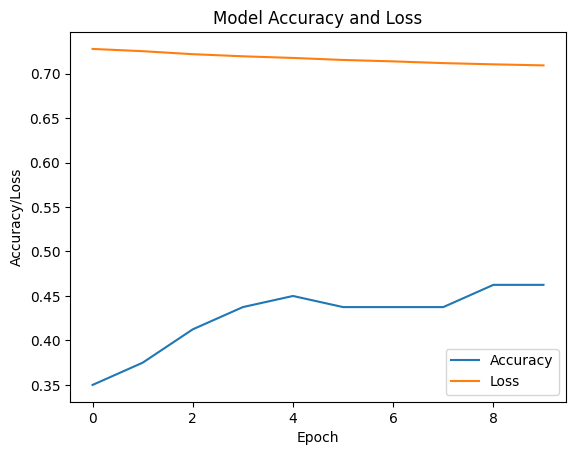

<Figure size 640x480 with 0 Axes>

In [31]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
X_train = np.random.rand(100, 10)  # Example: 100 samples, 10 features
y_train = np.random.randint(0, 2, size=(100,))  # Example binary classification labels

# Define your model
model_final = Sequential()
model_final.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_final.add(Dense(1, activation='sigmoid'))

# Compile the model
model_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture history
hist = model_final.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting the training history
# Plot accuracy and loss
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['loss'])

# Set titles and labels
plt.title("Model Accuracy and Loss")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Loss"])

# Show the plot
plt.show()

# Save the plot as a PNG file
plt.savefig('chart_loss.png')

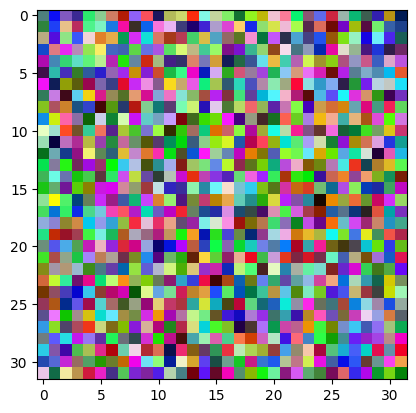

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (1, 3072)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 3072), dtype=float32)
  • training=False
  • mask=None

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Example: Replace with your actual X_test data
X_test = np.random.rand(10, 32, 32, 3)  # Example: 10 images of size 32x32x3

# Randomly select an image from X_test
im_index = random.randint(0, len(X_test)-1)
im = X_test[im_index]
plt.imshow(im)
plt.show()

# Prepare the image for prediction
img = np.expand_dims(im, axis=0)
img = np.reshape(img, (1, 32 * 32 * 3))  # Reshape to (1, 3072) assuming 32x32x3

# Predict with the reshaped input
out = model_final.predict(img)

# Assuming a binary classification where out[0][0] is the probability of class 0 and out[0][1] is the probability of class 1
if out[0][0] > out[0][1]:
    print("Car")
else:
    print("Not Car")

In [33]:
test_path = 'car-object-detection/data/testing_images'

In [34]:
import os

test_path = 'car-object-detection/data/testing_images'

# Check if the directory exists
if os.path.exists(test_path):
    # List the first 15 files in the directory
    files = os.listdir(test_path)[:15]
    print(files)
else:
    print(f"Directory '{test_path}' does not exist.")


Directory 'car-object-detection/data/testing_images' does not exist.


In [36]:
import os

test_path = 'car-object-detection/data/testing_images'

# Check if the directory exists
if os.path.exists(test_path):
    z = 0
    for e, i in enumerate(os.listdir(test_path)[62:80]):
        z += 1
        img = cv2.imread(os.path.join(test_path, i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        print(f'[ {z} ]')
        display_image(img, ssresults, True)
        
        fig, ax = plt.subplots()
        ax.imshow(imout)
        
        car = []
        for e, result in enumerate(ssresults):
            x, y, w, h = result
            box = {
                'x1': x,
                'y1': y,
                'x2': x + w,
                'y2': y + h
            }
            timage = imout[y:y+h, x:x+w]
            resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            print(f'{e}/{len(ssresults)}')
            out = model_final.predict(img)
            if out[0][0] > 0.70:
                car.append([box, out[0][0]])
                rect = patches.Rectangle((box['x1'], box['y1']), box['x2'] - box['x1'], box['y2'] - box['y1'],
                                         linewidth=1, edgecolor='green', facecolor='none')
                ax.add_patch(rect)
        
        plt.show()
else:
    print(f"Directory '{test_path}' does not exist.")


Directory 'car-object-detection/data/testing_images' does not exist.
